In [55]:
import pandas as pd
import numpy as np
import nltk
import re 

In [56]:
pd.read_csv('spam.csv',encoding = 'latin-1')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [57]:
# Loading dataset
df = pd.read_csv('spam.csv',encoding = 'latin-1')

#dropping Unwanted columns
df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1,inplace=True)

#Renaming column
df.columns = ['Class','Message']
df.head(5)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
# Basic analysis

In [59]:
df['Len'] = [len(x) for x in df.Message]
df.head()

,Class,Message,Len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [60]:
df.describe()

,Len
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [61]:
df.groupby('Class').describe()

Len                                                         
        count        mean        std   min    25%    50%    75%    max
Class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [62]:
df.shape

(5572, 3)

In [63]:
df['Class'].value_counts() / df.shape[0]*100

ham     86.593683
spam    13.406317
Name: Class, dtype: float64

### Word cloud

In [64]:
stopwords_list = nltk.corpus.stopwords.words('english')  # stop words list 
tokenizer = nltk.word_tokenize # to tokenize

In [65]:
from collections import Counter

In [66]:
common_words = {'words':[],'count':[]}

for sent in df['Message']:
    tokens = tokenizer(sent)
    # print(tokens)
    counts = Counter(tokens)
    # print(counts)
    common_words['words'].append(counts.most_common(1)[0][0])
    common_words['count'].append(counts.most_common(1)[0][1])

    # print('===========================================================================')

In [67]:
common_words_df = pd.concat([df,pd.DataFrame(common_words)],axis=1)
common_words_df

,Class,Message,Len,words,count
0,ham,"Go until jurong point, crazy.. Available only ...",111,...,2
1,ham,Ok lar... Joking wif u oni...,29,...,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,to,3
3,ham,U dun say so early hor... U c already then say...,49,U,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,he,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,.,3
5568,ham,Will Ì_ b going to esplanade fr home?,37,Will,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,Pity,1
5570,ham,The guy did some bitching but I acted like i'd...,125,The,1


In [68]:
# ! pip install wordcloud
import wordcloud as wc

world_cloud = wc.WordCloud().generate_from_text(' '.join(common_words_df.words))

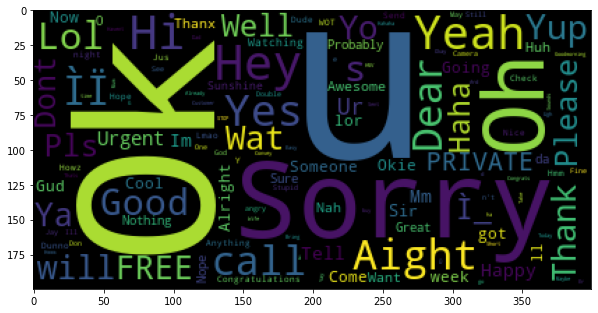

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
plt.imshow(world_cloud)

In [70]:
# Main Analysis

In [71]:
df = df.drop(['Len'],axis=1)
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [72]:

# converting all to lower and removing puncuation
def convert(i):
    clean_text = re.sub(r'[^a-zA-Z0-9]',' ', i.lower())
    return clean_text

df.Message = df.Message.apply(convert)
df.Message



0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will    b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: Message, Length: 5572, dtype: object

In [73]:

# removing extra spaces 
def rem_space(text):
    clean_text = re.sub(' +',' ',text)
    return clean_text

df.Message = df.Message.apply(rem_space)
df.Message

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [74]:
def rem_stopwords(text):
    tokens = tokenizer(text)
    clean_text = []
    for word in tokens:
        if word in stopwords_list:
            continue
        else:
            clean_text.append(word)
    words = ' '.join(clean_text)      
    return(words)     


In [75]:
df['Message'] = df['Message'].apply(rem_stopwords)


In [76]:
df['Message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [80]:
ham_message = df[df['Class']=='ham'].Message
spam_message = df[df['Class']=='spam'].Message

In [81]:
ham_text = ' '.join(ham_message)
spam_text = ' '.join(spam_message)

In [82]:
ham_wordCloud = wc.WordCloud().generate_from_text(ham_text)
spam_wordCloud = wc.WordCloud().generate_from_text(spam_text)

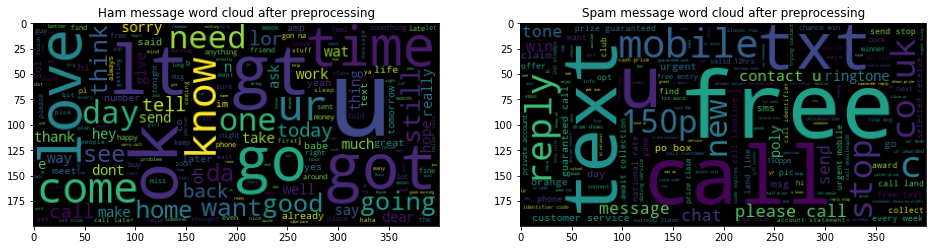

In [91]:
plt.figure(figsize =(16,12))

plt.subplot(1,2,1)
plt.title("Ham message word cloud after preprocessing")
plt.imshow(ham_wordCloud)

plt.subplot(1,2,2)
plt.title("Spam message word cloud after preprocessing")
plt.imshow(spam_wordCloud)